### Configuration du notebook et importation des modules

In [1]:
import os
os.chdir('../')
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/MachineLearning/projet'

In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import plotly
import seaborn as sns

### Importation des données

In [3]:
data = pd.read_csv('data/cac40_v3.csv').drop('Unnamed: 0', axis=1)
data

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation
0,AC,2007,10,1,50.8200,52.4500,50.7200,52.4400,939518,0.0456,...,0,0,0,0,0,0,0,0,0,0
1,AC,2007,10,10,57.6000,57.9000,56.4800,56.7400,1167710,0.0056,...,0,0,0,0,0,0,0,0,0,0
2,AC,2007,10,11,56.5700,57.9000,56.5700,57.0600,910369,-0.0053,...,0,0,0,0,0,0,0,0,0,0
3,AC,2007,10,12,57.1000,57.1000,55.5000,56.7600,996349,-0.0116,...,0,0,0,0,0,0,0,0,0,0
4,AC,2007,10,15,56.7600,57.2900,55.7700,56.1000,573647,-0.0032,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106537,VIV,2017,9,4,20.0650,20.2350,20.0300,20.1000,2250835,0.0027,...,0,0,0,0,0,0,0,0,0,0
106538,VIV,2017,9,5,20.0950,20.2900,19.9850,20.1550,3095238,-0.0020,...,0,0,0,0,0,0,0,0,0,0
106539,VIV,2017,9,6,20.0800,20.2100,20.0150,20.1150,2181925,-0.0065,...,0,0,0,0,0,0,0,0,0,0
106540,VIV,2017,9,7,20.1850,20.1850,19.9200,19.9850,4038684,-0.0023,...,0,0,0,0,0,0,0,0,0,0


# Exploration des données
***

### Question 1)

Q : Donner les charactéristiques de la base :
- Nombre de lignes
- Nombre de colonnes
- Format / Type de colonnes

In [4]:
print(f"Nombre de lignes : {data.shape[0]}")
print(f"Nombre de colonees : {data.shape[1]}")

Nombre de lignes : 106542
Nombre de colonees : 280


In [5]:
col_types = {}
for series_name, series in data.iteritems():
    col_types[series_name] = series.dtype
col_types = pd.DataFrame(col_types.values(),index=col_types.keys())
col_types.rename(axis='columns', mapper={0:'Type'}, inplace=True)

In [6]:
col_types

,Type
TICKER,object
annee,int64
mois,int64
jour,int64
OP,float64
...,...
collaboration,int64
developpement,int64
l_acquisition,int64
participation,int64


### Question 2)

Q : Présenter quelques statistiques de la base.

<b>2. a. Variables quantitatives</b>

In [7]:
def numerical_description(variables:list, data:pd.DataFrame) -> pd.DataFrame:
    numeric_describe = data[variables].describe()
    numeric_describe.loc["count"] = numeric_describe.loc["count"].astype('int64')
    min_max = numeric_describe.loc["max"] - numeric_describe.loc["min"]
    min_max.name = "Max min diff"
    numeric_describe = numeric_describe.append(min_max)
    return numeric_describe

> _2. a. i. Variables dépendentes_

In [8]:
variables_num_dep = ["RDMT_J", "RDMT_S", "RDMT_M"]
numeric_describe = numerical_description(variables_num_dep, data)

In [9]:
numeric_describe

,RDMT_J,RDMT_S,RDMT_M
count,"106,542.0000","106,542.0000","106,542.0000"
mean,0.0003,0.0015,0.0060
std,0.0219,0.0478,0.0959
min,-0.2624,-0.3753,-0.6000
25%,-0.0102,-0.0228,-0.0451
50%,0.0002,0.0018,0.0070
75%,0.0106,0.0256,0.0583
max,0.2632,0.5205,1.1347
Max min diff,0.5256,0.8958,1.7347


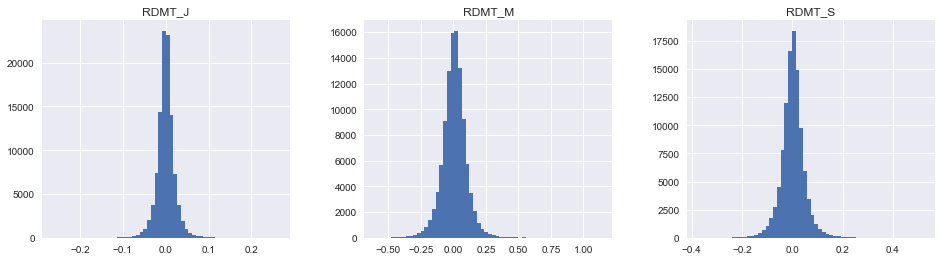

In [10]:
data[variables_num_dep].hist(bins=60, figsize=(16,4), layout=(1,3));

> _2. a. ii. Variables explicatives candidates_

In [11]:
variables_num_explic = ["OP", "UP", "DO", "CL", "VO"] + [f"{var}_{x}" for x in ["J", "S", "M"] for var in ["HISTO", "VOL", "UP", "DO"]]
numeric_describe = numerical_description(variables_num_explic, data)

In [12]:
numeric_describe

,OP,UP,DO,CL,VO,HISTO_J,VOL_J,UP_J,DO_J,HISTO_S,VOL_S,UP_S,DO_S,HISTO_M,VOL_M,UP_M,DO_M
count,"106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000"
mean,52.7514,53.3303,52.1291,52.7383,"2,697,386.7025",0.0003,"147,641.4109",0.0003,0.0003,0.0014,"250,007.6708",0.0013,0.0015,0.0056,"182,393.0719",0.0053,0.0057
std,41.9334,42.2790,41.5656,41.9329,"3,253,352.8790",0.0219,"48,191,262.0662",0.0193,0.0206,0.0478,"81,604,381.0431",0.0452,0.0481,0.0938,"59,534,437.3877",0.0912,0.0953
min,2.2400,2.2740,2.1200,2.1960,0.0000,-0.2624,-1.0000,-0.2956,-0.2753,-0.3753,-1.0000,-0.3442,-0.3882,-0.6084,-1.0000,-0.5790,-0.6045
25%,23.7000,24.0350,23.3150,23.6950,"693,341.2500",-0.0102,-0.2256,-0.0085,-0.0090,-0.0229,-0.2666,-0.0221,-0.0226,-0.0443,-0.3034,-0.0437,-0.0443
50%,42.0950,42.6000,41.5275,42.0650,"1,549,323.0000",0.0002,-0.0082,0.0000,0.0008,0.0017,-0.0061,0.0014,0.0021,0.0063,-0.0117,0.0061,0.0072
75%,67.2734,67.9900,66.5500,67.2500,"3,488,776.5000",0.0106,0.2789,0.0087,0.0098,0.0255,0.3542,0.0242,0.0258,0.0567,0.4169,0.0551,0.0576
max,394.9500,397.0000,391.0500,395.3500,"63,825,207.0000",0.2632,"15,729,999,999.0000",0.2880,0.2693,0.5205,"26,636,299,999.0000",0.4516,0.6227,1.0593,"19,432,499,999.0000",1.0490,1.0743
Max min diff,392.7100,394.7260,388.9300,393.1540,"63,825,207.0000",0.5256,"15,730,000,000.0000",0.5836,0.5445,0.8958,"26,636,300,000.0000",0.7958,1.0110,1.6678,"19,432,500,000.0000",1.6281,1.6789


> _2. a. iii. Corrélation dans les variables numériques_

In [13]:
numeric_variables = variables_num_dep + variables_num_explic
corr = data[numeric_variables].corr()

In [14]:
def __plot_correlation_matrix_plt(corr: pd.DataFrame, title:str):
    fig = plt.figure(figsize=(12,12))
    plt.matshow(corr, fignum = fig.number)
    plt.xticks(range(len(numeric_variables)), numeric_variables, rotation=45)
    plt.yticks(range(len(numeric_variables)), numeric_variables)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=10)
    plt.title(title, fontsize=16, pad=30);

def __plot_correlation_matrix_sns(corr: pd.DataFrame, title:str):
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
    plt.title(title, pad=30);

def plot_correlation_matrix(corr: pd.DataFrame, title:str, which:str):
    if which=='pyplot':
        return __plot_correlation_matrix_plt(corr, title)
    elif which=='seaborn':
        return __plot_correlation_matrix_sns(corr, title)
    else:
        raise ValueError("Plotting method not implemented. Choose 'pyplot' or 'seaborn'")

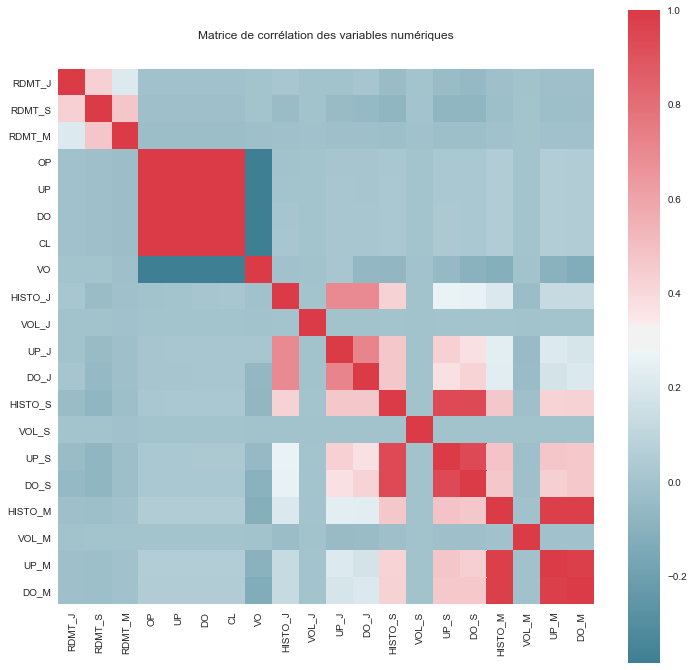

In [15]:
plot_correlation_matrix(corr, "Matrice de corrélation des variables numériques", 'seaborn')

**Conclusion** : On remarque que certaines variables devront être écartées car trop similaires, et que dans l'ensemble peu de variables numériques sont fortement corrélées avec les variables dépendantes que nous cherchons à expliquer.

<b>2. b. Variables catégoriques</b>

In [16]:
non_numeric_variables = data.columns[~data.columns.isin(numeric_variables)]
words = non_numeric_variables[4:]
descriptive_variables = non_numeric_variables[:4]

> _2. b. i. Variables descriptives_

------------- Tickers -------------

In [17]:
all_tickers = data.TICKER.unique()
print(f"Total de tickers distincts: {len(all_tickers)}")
print("Tickers:", all_tickers)

Total de tickers distincts: 40
Tickers: ['AC' 'ACA' 'AI' 'AIR' 'ATO' 'BN' 'BNP' 'CA' 'CAP' 'CS' 'DG' 'EI' 'EN'
 'ENGI' 'FP' 'FR' 'FTI' 'GLE' 'KER' 'LHN' 'LR' 'MC' 'ML' 'MT' 'OR' 'ORA'
 'PUB' 'RI' 'RNO' 'SAF' 'SAN' 'SGO' 'SOLB' 'STM' 'SU' 'SW' 'UG' 'UL' 'VIE'
 'VIV']


------------- Observation dates -------------

In [18]:
def compute_day_count(ticker:str, data:pd.DataFrame) -> dict:
    ''' Computes the day count of observations for given ticker
    '''
    tmp = data.loc[data['TICKER']==ticker]
    day_count = {}
    for year in data["annee"].unique():
        day_count[year] = tmp.loc[tmp["annee"]==year].set_index(["annee", "mois", "jour"]).shape[0]
    return day_count

In [19]:
years = data["annee"].unique()
print(f"Nombre d'années de données: {len(years)}")
print(f"Années: {years}")

Nombre d'années de données: 11
Années: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [20]:
all_day_counts = {}
for ticker in all_tickers:
    all_day_counts[ticker] = compute_day_count(ticker, data)

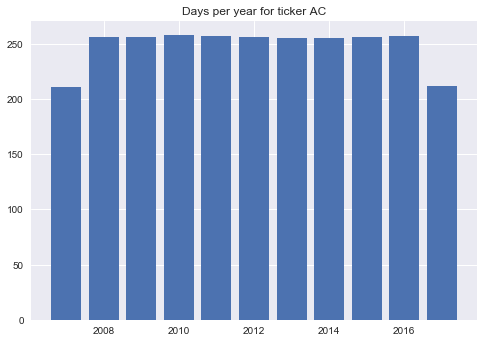

In [21]:
day_count = all_day_counts[all_tickers[0]]
plt.bar(day_count.keys(), day_count.values())
plt.title(f"Days per year for ticker {all_tickers[0]}");

In [22]:
avg_days_in_year = {}
for (ticker, day_count) in all_day_counts.items():
    for (year, count) in day_count.items():
        try:
            avg_days_in_year[year] += count
        except KeyError:
            avg_days_in_year[year] = count
for year in years:
    avg_days_in_year[year] /= len(all_day_counts)

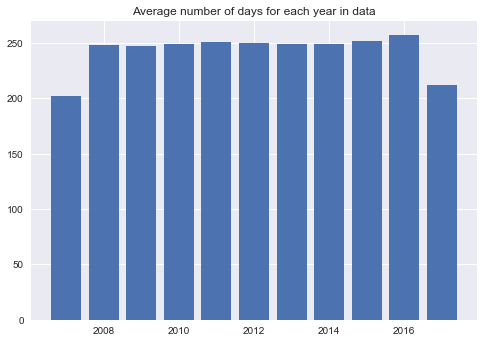

In [23]:
plt.bar(avg_days_in_year.keys(), avg_days_in_year.values())
plt.title("Average number of days for each year in data");

**Conclusion :** Il n'y a pas de _day basis_ exacte qui constitue une année et les années elle-mêmes apparaissent avec un nombre de jours différents parfois par ticker &rarr; Il est possible qu'il y ait des **valeurs manquantes**.

> _2. b. ii. Variables mots_

In [24]:
word_data = data[words.to_list()]

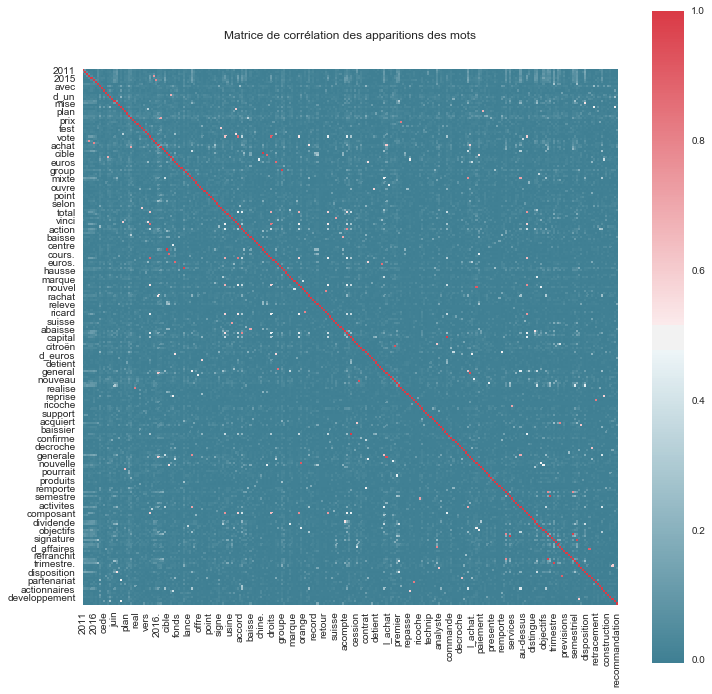

In [25]:
plot_correlation_matrix(word_data.corr(), "Matrice de corrélation des apparitions des mots", 'seaborn')

**Conclusion**: On peut déjà remarquer que certains mots seront à écarter faute d'être trop similaires (points rouges en dehors de la diagonale).

In [26]:
total_appearances = word_data.sum()

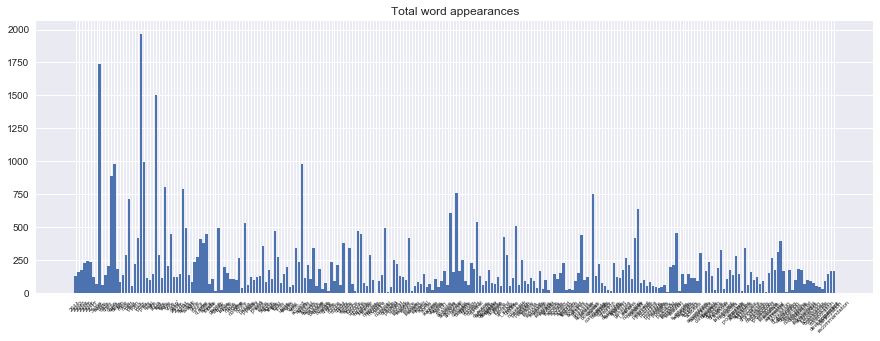

In [27]:
fig = plt.figure(figsize=(15,5))
plt.bar(total_appearances.index, total_appearances)
plt.xticks(range(len(total_appearances.index)), total_appearances.index, fontsize='xx-small', rotation=45)
plt.title("Total word appearances");

**Conclusion**: Certains mots seront à écarter faute d'être trop peu apparus.

# Filtration des données
***

### Question 3)

Q : Montrer que, _quelque soit le ticker_, la liste des mots apparaissant sur 400 lignes et dont le rendement mensuel est en moyenne supérieur à 1% est telle que la table dans le sujet.  

In [28]:
# On veut l'effet du mot, indépendamment de ticker
freq_word_ret = {}
for word in words:
    if data[word].sum() > 400:
        mean_return = np.mean(data["RDMT_M"].loc[data[word] == 1])
        num_app = data[word].sum()
        if mean_return > 0.01:
            freq_word_ret[word] = (num_app, mean_return)

In [29]:
df = pd.DataFrame(freq_word_ret).transpose().rename(axis='columns', mapper={0:"Nombre d'apparitions", 1:"Rendement mensuel moyen"})
df["Nombre d'apparitions"] = df["Nombre d'apparitions"].astype('int64')
df.index.name = "Mot"
df

,Nombre d'apparitions,Rendement mensuel moyen
Mot,,
part,716,0.0119
plus,418,0.0101
pour,1966,0.0136
euros,446,0.0104
group,493,0.0129
passe,527,0.0138
titre,467,0.0122
groupe,467,0.0146
nouvel,494,0.0115


<b>Filtrer la base sur l'apparition de ces mots</b>

In [30]:
keepers = list(freq_word_ret.keys())
data["KEEP_ROW"] = data[keepers].sum(axis=1)
data = data.loc[~(data["KEEP_ROW"] == 0)].drop("KEEP_ROW", axis=1).reset_index(drop=True)

In [31]:
data.shape

(7129, 280)

### Question 4)

Q : Retrait des variables trop corrélées (positivement ou négativement).

In [32]:
CORRELATION_THRESHOLD = 0.75
correlation_matrix = data.loc[:,~data.columns.isin(["TICKER", "annee", "mois", "jour"])].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
high_corr_vars = [col for col in upper_triangle.columns if any(upper_triangle[col] > CORRELATION_THRESHOLD)]

In [33]:
data.drop(high_corr_vars, axis=1, inplace=True)
data

,TICKER,annee,mois,jour,OP,VO,RDMT_J,RDMT_S,RDMT_M,HISTO_J,...,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation
0,AC,2010,10,11,27.3700,583747,0.0207,0.0658,0.1233,0.0097,...,0,0,0,0,0,0,0,0,0,0
1,AC,2010,10,28,29.2200,752703,0.0115,0.0539,0.1179,-0.0033,...,0,0,0,0,0,0,0,0,0,0
2,AC,2010,10,6,26.9500,1747197,-0.0224,0.0426,0.1321,0.0305,...,0,0,0,0,0,0,0,0,0,0
3,AC,2010,11,26,33.4150,871648,-0.0221,-0.0126,0.0015,0.0013,...,0,0,0,0,0,0,0,0,0,0
4,AC,2010,11,3,29.7450,880633,0.0292,0.0409,0.1264,0.0047,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,VIV,2017,9,20,21.0750,2787945,-0.0043,-0.0112,-0.0257,-0.0071,...,0,0,0,0,0,0,0,0,0,0
7125,VIV,2017,9,25,20.7100,2082640,-0.0014,0.0376,-0.0029,0.0005,...,0,0,0,0,0,0,0,0,0,0
7126,VIV,2017,9,26,20.7650,1622952,0.0029,0.0326,-0.0082,-0.0014,...,0,0,0,0,0,0,0,0,0,0
7127,VIV,2017,9,29,21.0600,6358735,0.0054,-0.0121,0.0140,0.0291,...,0,0,0,0,0,0,0,0,0,0


### Question 5)

Q : Choisir un algorithme parmi les suivants :
- XGBoost <b>X</b>
- GradientBoostingClassifier
- neural_network.MLPClassifier

**_Qu'est-ce que l'algorithme XGBoost?_**

_XGBoost_, de son nom _Extreme Gradient Boosting_ est un algorithme construit pour optimiser l'algorithme _Gradient Boosting_, qui est lui-même une variante du _Random Forest_. GB fait des prédicitions grâce à un ensemble d'arbres de décision qui "votent" pour la prédiction finale. Au différent de _Random Forest_, la construction même de l'ensemble d'arbres est faite de manière séquentielle de sorte à minimiser la fonction objectif par déscente de gradients.
_XGBoost_ cherche à optimiser l'implémentation de GB, notamment en parallélisant la construction des arbres et en optimisant l'utilisation de resources physiques disponibles.

### Question 6)

Q : Analyser les hyperparamètres et assurer un grid computing d'environ 100 n-uplets de paramètres. Une cross-validation de 4 folds est souhaitée.

D'après la [documentation officielle](https://xgboost.readthedocs.io/en/latest/parameter.html) de XGBoost il y a trois types de paramètres qui vont nous concerner dans cette étude.
> 1. **Paramètres Géneraux**: paramètres liés au choix de technique de boosting (avec modèle linéaire ou arbre de décisions)
> 2. **Paramètres de "booster"**: paramètres du booster choisi &rarr; concernent le _Bias-Variance tradeoff_
>> - learning_rate \[défault = 0.3] : contrôle le poids des features utilisées pour rendre l'algo plus conservateur (réduire possibilité d'overfit).
>> - min_child_weight \[defaut = 1] : définit le poids minimal d'un noeud enfant pour qu'il soit créé. Contrôle l'importance des relation à apprendre et donc l'overfitting.
>> - max_depth \[défaut = 6] : la profondeur maximale de chaque arbre créé. Contrôle contre l'overfit.
>> - gamma \[défaut = 0] : valeur minimale d'amélioration de l'objectif requise par l'algorithme pour continuer la création d'un noeud enfant dans un arbre. Contrôle l'overfit.
> 3. **Paramètres d'apprentissage**: paramètres liés à la tâche entreprise (i.e. qu'est-ce qu'on apprend ? comment ?)
>> - objective : fonction objectif d'apprentissage

avec : 
- _Bias_ : L'erreur moyenne de l'algo dans un unique jeu de données (fit)
- _Variance_ : La variation des erreurs de l'algo entre plusieurs jeux de données (généralisation)

voire aussi :
- [Complete Guide to Parameter Tuning in XGBoost with codes in Python](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [34]:
from sklearn.model_selection import train_test_split, KFold
from xgboost.sklearn import XGBClassifier

In [111]:
X = data.loc[:,~data.columns.isin(variables_num_dep + ["TICKER"])]
y = data[variables_num_dep[0]]
#y_label = [1 if v > mean(0) else 0 for v in y] pour non normales centrées ?
y_label = pd.DataFrame({'y':[1 if v > 0 else 0 for v in y]})
y_label = y_label.y

In [112]:
# define folds for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=42)
kf = KFold(n_splits=4)

In [85]:
# define parameter bounds and compute parameter grid
import itertools

hyper_learning_rate = np.linspace(0.01,0.2,5)
hyper_max_depth = np.linspace(3,10,3).astype('int64')
hyper_min_child_weight = np.linspace(1,3,5).astype('int64')
hyper_gamma = np.linspace(0,2,5)

hyper_parameter_list = [hyper_learning_rate, hyper_max_depth, hyper_min_child_weight, hyper_gamma]
hyper_parameter_grid = list(itertools.product(*hyper_parameter_list))

In [86]:
len(hyper_parameter_grid)

375

In [109]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score

def metriques_classif(type_model:str, parametres:dict, 
                     y_cv:list, predictions: list) -> tuple:
    auc = round(roc_auc_score(y_cv, predictions), 4)
    precision = round(precision_score(y_cv, predictions), 4)
    recall = round(recall_score(y_cv, predictions), 4)
    return ([{'algorithm':type_model,
             'parametres': parametres,
             'metriques': {'auc':auc,
                           'precision':precision,
                           'recall':recall}
             }])

In [116]:
results = []
for n in range(100):
    param_learning_rate = hyper_parameter_grid[n][0]
    param_max_depth = hyper_parameter_grid[n][1]
    param_min_child_weight = hyper_parameter_grid[n][2]
    param_gamma = hyper_parameter_grid[n][3]
    
    y_cv = []
    predictions = []
    for train_index, valid_index in kf.split(X_train, y_train):
        xgb = XGBClassifier(booster='gbtree', objective='binary:logistic',
                            learning_rate=param_learning_rate,
                            max_depth=param_max_depth,
                            min_child_weight=param_min_child_weight,
                            gamma=param_gamma)
    
        X_train_k, X_valid_k = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_k, y_valid_k = y_train.iloc[train_index], y_train.iloc[valid_index]
        
        xgb_model = xgb.fit(X_train_k, y_train_k)
        pred_valid = xgb_model.predict(X_valid_k)
        y_cv = y_cv + y_valid_k.to_list()
        predictions = predictions + pred_valid.tolist()
    
    results = results + metriques_classif("XGBClassifier",
                                         {'learning_rate':param_learning_rate,
                                          'max_depth':param_max_depth,
                                          'min_child_weight':param_min_child_weight,
                                          'gamma':param_gamma},
                                         y_cv, predictions)

In [120]:
import pickle

tuning_results = open("results/hyper_param_tuning_results.picke", "wb")
pickle.dump(results, tuning_results)
tuning_results.close()

In [151]:
def plot_tuning_results(results:list, param_name:str):
    auc = [res['metriques']['auc'] for res in results]
    precision = [res['metriques']['precision'] for res in results]
    recall = [res['metriques']['recall'] for res in results]
    param = [res['parametres'][param_name] for res in results]
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].scatter(param, auc)
    ax[0].set_xlabel(param_name)
    ax[0].set_ylabel('Validation AUC')
    ax[1].scatter(param, precision)
    ax[1].set_xlabel(param_name)
    ax[1].set_ylabel('Validation Precision')
    ax[2].scatter(param, recall)
    ax[2].set_xlabel(param_name)
    ax[2].set_ylabel('Validation recall');

    return

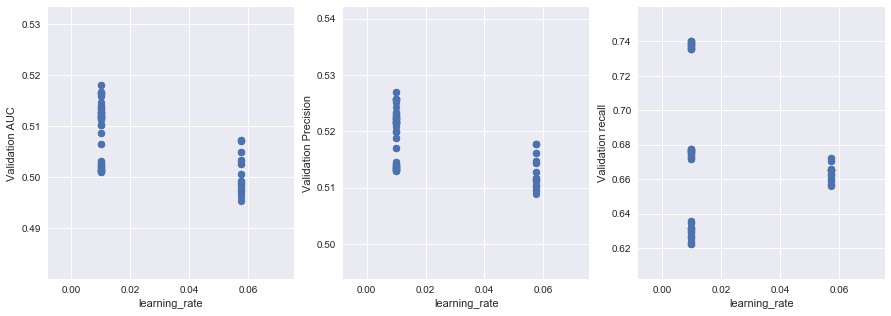

In [152]:
plot_tuning_results(results, 'learning_rate')

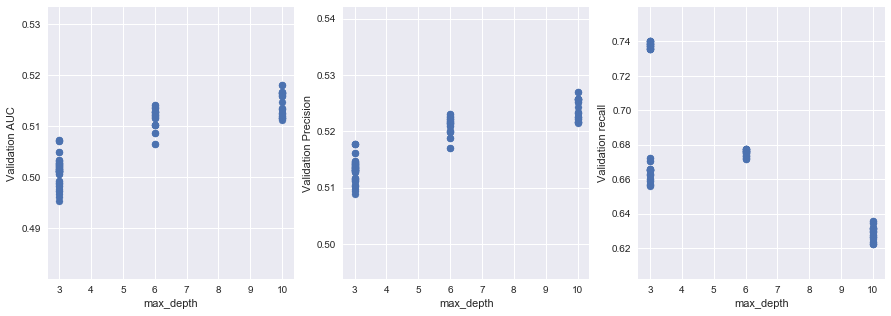

In [153]:
plot_tuning_results(results, 'max_depth')

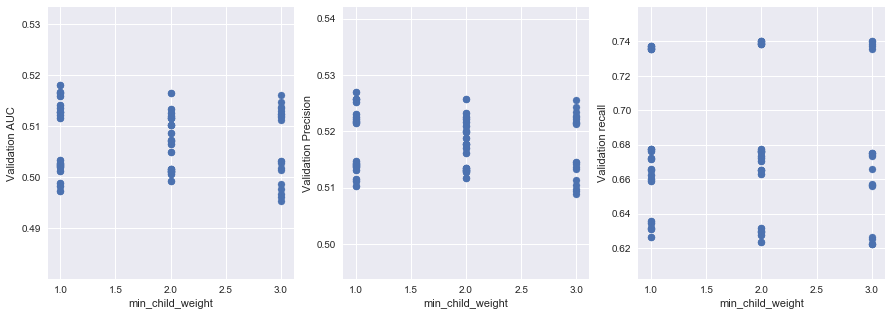

In [154]:
plot_tuning_results(results, 'min_child_weight')

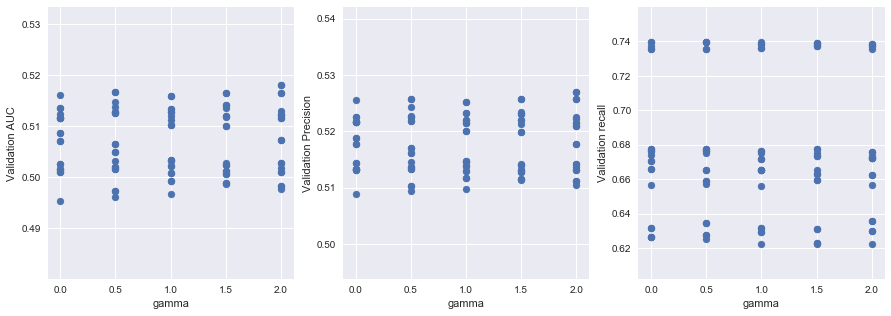

In [155]:
plot_tuning_results(results, 'gamma')

In [163]:
# Get "best" model as defined by L2 norm of computed metrics
score_norms = [np.sqrt(pow(x['metriques']['auc'],2) + pow(x['metriques']['precision'],2) + pow(x['metriques']['recall'],2)) for x in results]
max_score_norm = np.argmax(score_norms)
max_score_norm_res = results[max_score_norm]

In [169]:
learning_rate = max_score_norm_res['parametres']['learning_rate']
max_depth = max_score_norm_res['parametres']['max_depth']
min_child_weight = max_score_norm_res['parametres']['min_child_weight']
gamma = max_score_norm_res['parametres']['gamma']
xgb = XGBClassifier(learning_rate=learning_rate,
                     max_depth=max_depth,
                     min_child_weight=min_child_weight,
                     gamma=gamma)

In [171]:
model = xgb.fit(X_train, y_train)

In [172]:
y_test_pred = model.predict(X_test)

In [174]:
roc_auc_score(y_test_pred, y_test)

0.5120500638098313

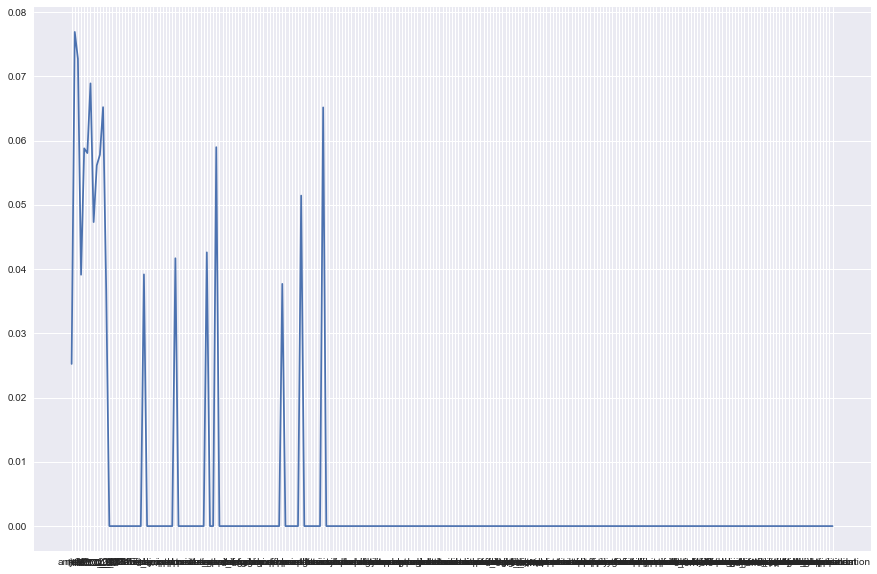

In [193]:
features = X_train.columns
importances = model.feature_importances_
plt.plot(features, importances)
plt.gcf().set_size_inches(15,10);

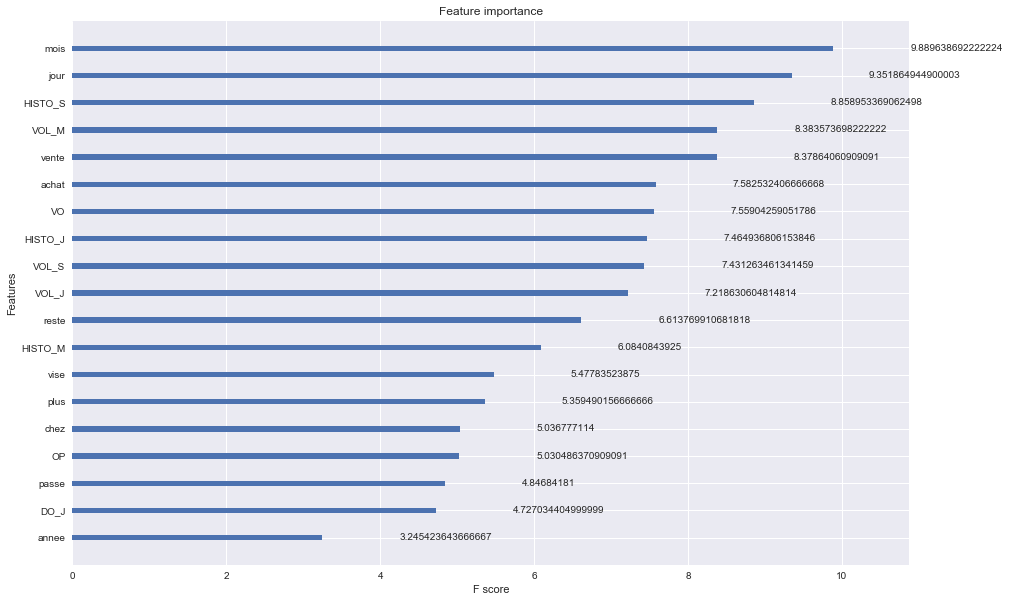

In [185]:
from xgboost import plot_importance
plot_importance(model, max_num_features=50, importance_type="gain")
plt.gcf().set_size_inches(15,10);